In [8]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib as mp

from Bio.ExPASy import Enzyme
import re

import difflib

mp.style.use('ggplot')
mp.pylab.rcParams['figure.figsize'] = 32,32

In [4]:
pathways = pd.read_csv("../Data/Old Functional Data/Target pathways energy and c fixation.csv")
reads = pd.read_table("../Data/Old Functional Data/functional_distribution_of_matching_reads.txt")

In [5]:
from glob import glob

eggnogDescriptions = pd.DataFrame({'Description': []})
for desc in glob("../Databases/eggNOG/*.description.txt"):
    eggnogDescriptions = eggnogDescriptions.append(pd.read_table(desc, header=None, index_col=0, names=['Description']))
eggnogDescriptions[eggnogDescriptions.Description == "'Cold-shock' DNA-binding domain protein"]

Description
actNOG02158    'Cold-shock' DNA-binding domain protein
aproNOG17137   'Cold-shock' DNA-binding domain protein
aproNOG35888   'Cold-shock' DNA-binding domain protein
bactNOG143451  'Cold-shock' DNA-binding domain protein
bactNOG146189  'Cold-shock' DNA-binding domain protein
bactNOG236614  'Cold-shock' DNA-binding domain protein
bactNOG247567  'Cold-shock' DNA-binding domain protein
bactNOG250396  'Cold-shock' DNA-binding domain protein
bactNOG250811  'Cold-shock' DNA-binding domain protein
bactNOG252366  'Cold-shock' DNA-binding domain protein
bactNOG267653  'Cold-shock' DNA-binding domain protein
bproNOG12397   'Cold-shock' DNA-binding domain protein
NOG201653      'Cold-shock' DNA-binding domain protein
NOG52820       'Cold-shock' DNA-binding domain protein
NOG79155       'Cold-shock' DNA-binding domain protein
proNOG105701   'Cold-shock' DNA-binding domain protein
proNOG55390    'Cold-shock' DNA-binding domain protein
proNOG61812    'Cold-shock' DNA-binding domain protein
proNOG62083    'Cold-shock' DNA-binding domain protein
proNOG84022    'Cold-shock' DNA-binding domain protein

In [6]:
enzymes=dict()
enzymeNames=dict()
for r in Enzyme.parse(open("../Databases/enzyme/enzyme.dat")):
    enzymes[r['ID']] = r
    enzymeNames[r['DE']] = r
    for n in r['AN']:
        if not n in enzymeNames:
            enzymeNames[n] = r

In [9]:
for i, e in pathways[pathways.Reference.isnull()].iterrows():
    matches = difflib.get_close_matches(e['Enzyme'], enzymeNames.keys(), 3, 0.9)
    if len(matches) > 0:
        print e['Enzyme'], matches, enzymeNames[matches[0]]['ID']
        pathways.loc[i, 'Reference'] = "EC %s" % enzymeNames[matches[0]]['ID']

hydroxylamine oxidoreductase  ['Hydroxylamine oxidoreductase.'] 1.7.3.6
Nitrite reductase ['Nitrite reductase.', 'Nitrate reductase.'] 1.7.2.1
Nitrate reductase ['Nitrate reductase.', 'Nitrate reductase Z.', 'Nitrate reductase A.'] 1.7.99.4
Nitrous oxide reductase ['Nitrous-oxide reductase.'] 1.7.2.4


In [10]:
def getNames(e):
    ec = re.sub("EC ", "", e['Reference'])
    if ec in enzymes:
        enzyme = enzymes[ec]
        names = [enzyme['DE']] + enzyme['AN']
        return names
    else:
        print "Not found: ", ec
        return []
    
pathways['Names'] = pathways[pathways.Reference.notnull()].apply(getNames, axis=1)

Not found:  5.1.99.1 
Not found:  5.4.99.2 
Not found:   2.7.9.2
Not found:  crtEIBY, blh


In [11]:
def findpaths(read):
        paths = []
        s = difflib.SequenceMatcher(lambda x: x in " .()", "", read['Function'])
        
        for i,e in pathways[pathways.Names.notnull()].iterrows():
            for p in e['Names']:
                s.set_seq1(p)
                if s.ratio() > 0.9:
                    if not e['Pathway'] in paths:
                        paths.append(e['Pathway'])
                    print read['Function'], e['Enzyme'], p, s.ratio()

        return paths
        
reads['Pathways'] = reads.apply(findpaths, axis=1)

Acetyl-CoA acetyltransferase Acetyl-CoA C-acetyltransferase Acetyl-CoA C-acetyltransferase. 0.949152542373
Acetyl-CoA acetyltransferase Acetyl-CoA C-acetyltransferase Acetyl-CoA C-acetyltransferase. 0.949152542373
Aconitase aconitate hydratase Aconitase. 0.947368421053
Aconitate hydratase aconitate hydratase Aconitate hydratase. 0.974358974359
Aconitate hydratase 2 aconitate hydratase Aconitate hydratase. 0.926829268293
Aldolase Fructose-bisphosphate aldolase Aldolase. 0.941176470588
Cytochrome c Nitrite reductase Cytochrome cd. 0.923076923077
Cytochrome c1 Nitrite reductase Cytochrome cd1. 0.928571428571
Enoyl-CoA hydratase Crotonyl-CoA hydratase Enoyl-CoA hydratase. 0.974358974359
Enoyl-CoA hydratase Crotonyl-CoA hydratase Enoyl-CoA hydratase. 0.974358974359
Fructose-1,6-bisphosphatase Fructose-bisphosphatase Fructose-bisphosphatase. 0.901960784314
Fructose-1,6-bisphosphatase Fructose-bisphosphatase Fructose 1,6-bisphosphatase. 0.945454545455
Fructose-1-6-bisphosphatase Fructose-bisp

In [12]:
pathwaysreads

NameError: name 'pathreads' is not defined

In [292]:
d = []
for i, r in pathreads.iterrows():
    for p in r['Pathways']:
        r['Pathway'] = p
        d.append(r.copy())
        
pr = pd.DataFrame(d).set_index(['Pathway', 'Function']).sort().iloc[:,0:30]
pr.columns=pd.MultiIndex.from_product([['S1', 'S2', 'S3', 'S4', 'S5', 'S6'], ['Archaea', 'Bacteria', 'Chloroplast', 'Fungi', 'Unassigned']], names=['Sample', 'Organism'])

In [326]:
pathways[pathways.Pathway == "reductive tricarboxylic acid cycle"]

Enzyme    Reference  \
0                      citryl coa lyase  EC 4.1.3.34   
1                     ATP citrate lyase   EC 2.3.3.8   
2                   Citryl CoA synthase  EC 6.2.1.18   
3                   aconitate hydratase   EC 4.2.1.3   
4              oxalosuccinate reductase          NaN   
5             Isocitrate dehydrogenase   EC 1.1.1.41   
6            2-oxoglutarate carboxylase   EC 6.4.1.7   
7               2-oxoglutarate synthase   EC 1.2.7.3   
8             succinyl- CoA synthetase    EC 6.2.1.5   
9                   fumarate reductase    EC 1.3.5.4   
10                   Fumarate hydratase   EC 4.2.1.2   
11                 Malate dehydrogenase  EC 1.1.1.37   
12  Isocitrate dehydrogenase (NADP(+)).  EC 1.1.1.42   

                               Pathway        Role  \
0   reductive tricarboxylic acid cycle  C fixation   
1   reductive tricarboxylic acid cycle  C fixation   
2   reductive tricarboxylic acid cycle  C fixation   
3   reductive tricarboxylic acid cycle  C fixation   
4   reductive tricarboxylic acid cycle  C fixation   
5   reductive tricarboxylic acid cycle  C fixation   
6   reductive tricarboxylic acid cycle  C fixation   
7   reductive tricarboxylic acid cycle  C fixation   
8   reductive tricarboxylic acid cycle  C fixation   
9   reductive tricarboxylic acid cycle  C fixation   
10  reductive tricarboxylic acid cycle  C fixation   
11  reductive tricarboxylic acid cycle  C fixation   
12  reductive tricarboxylic acid cycle  C fixation   

                                                Names  
0   [Citryl-CoA lyase., (3S)-citryl-CoA oxaloaceta...  
1   [ATP citrate synthase., Acetyl-CoA:oxaloacetat...  
2                              [Citrate--CoA ligase.]  
3   [Aconitate hydratase., Aconitase., Cis-aconita...  
4                                                 NaN  
5   [Isocitrate dehydrogenase (NAD(+))., Beta-keto...  
6   [2-oxoglutarate carboxylase., Carboxylating fa...  
7   [2-oxoglutarate synthase., 2-ketoglutarate fer...  
8   [Succinate--CoA ligase (ADP-forming)., Succina...  
9   [Fumarate reductase (quinol)., Fumarate reduct...  
10                   [Fumarate hydratase., Fumarase.]  
11      [Malate dehydrogenase., Malic dehydrogenase.]  
12  [Isocitrate dehydrogenase (NADP(+))., Dual-cof...

In [13]:
pr

NameError: name 'pr' is not defined

In [334]:
difflib.get_close_matches("Citryl CoA Synthase", reads.Function)

['Citrate synthase', 'Histidyl-tRNA synthetase']

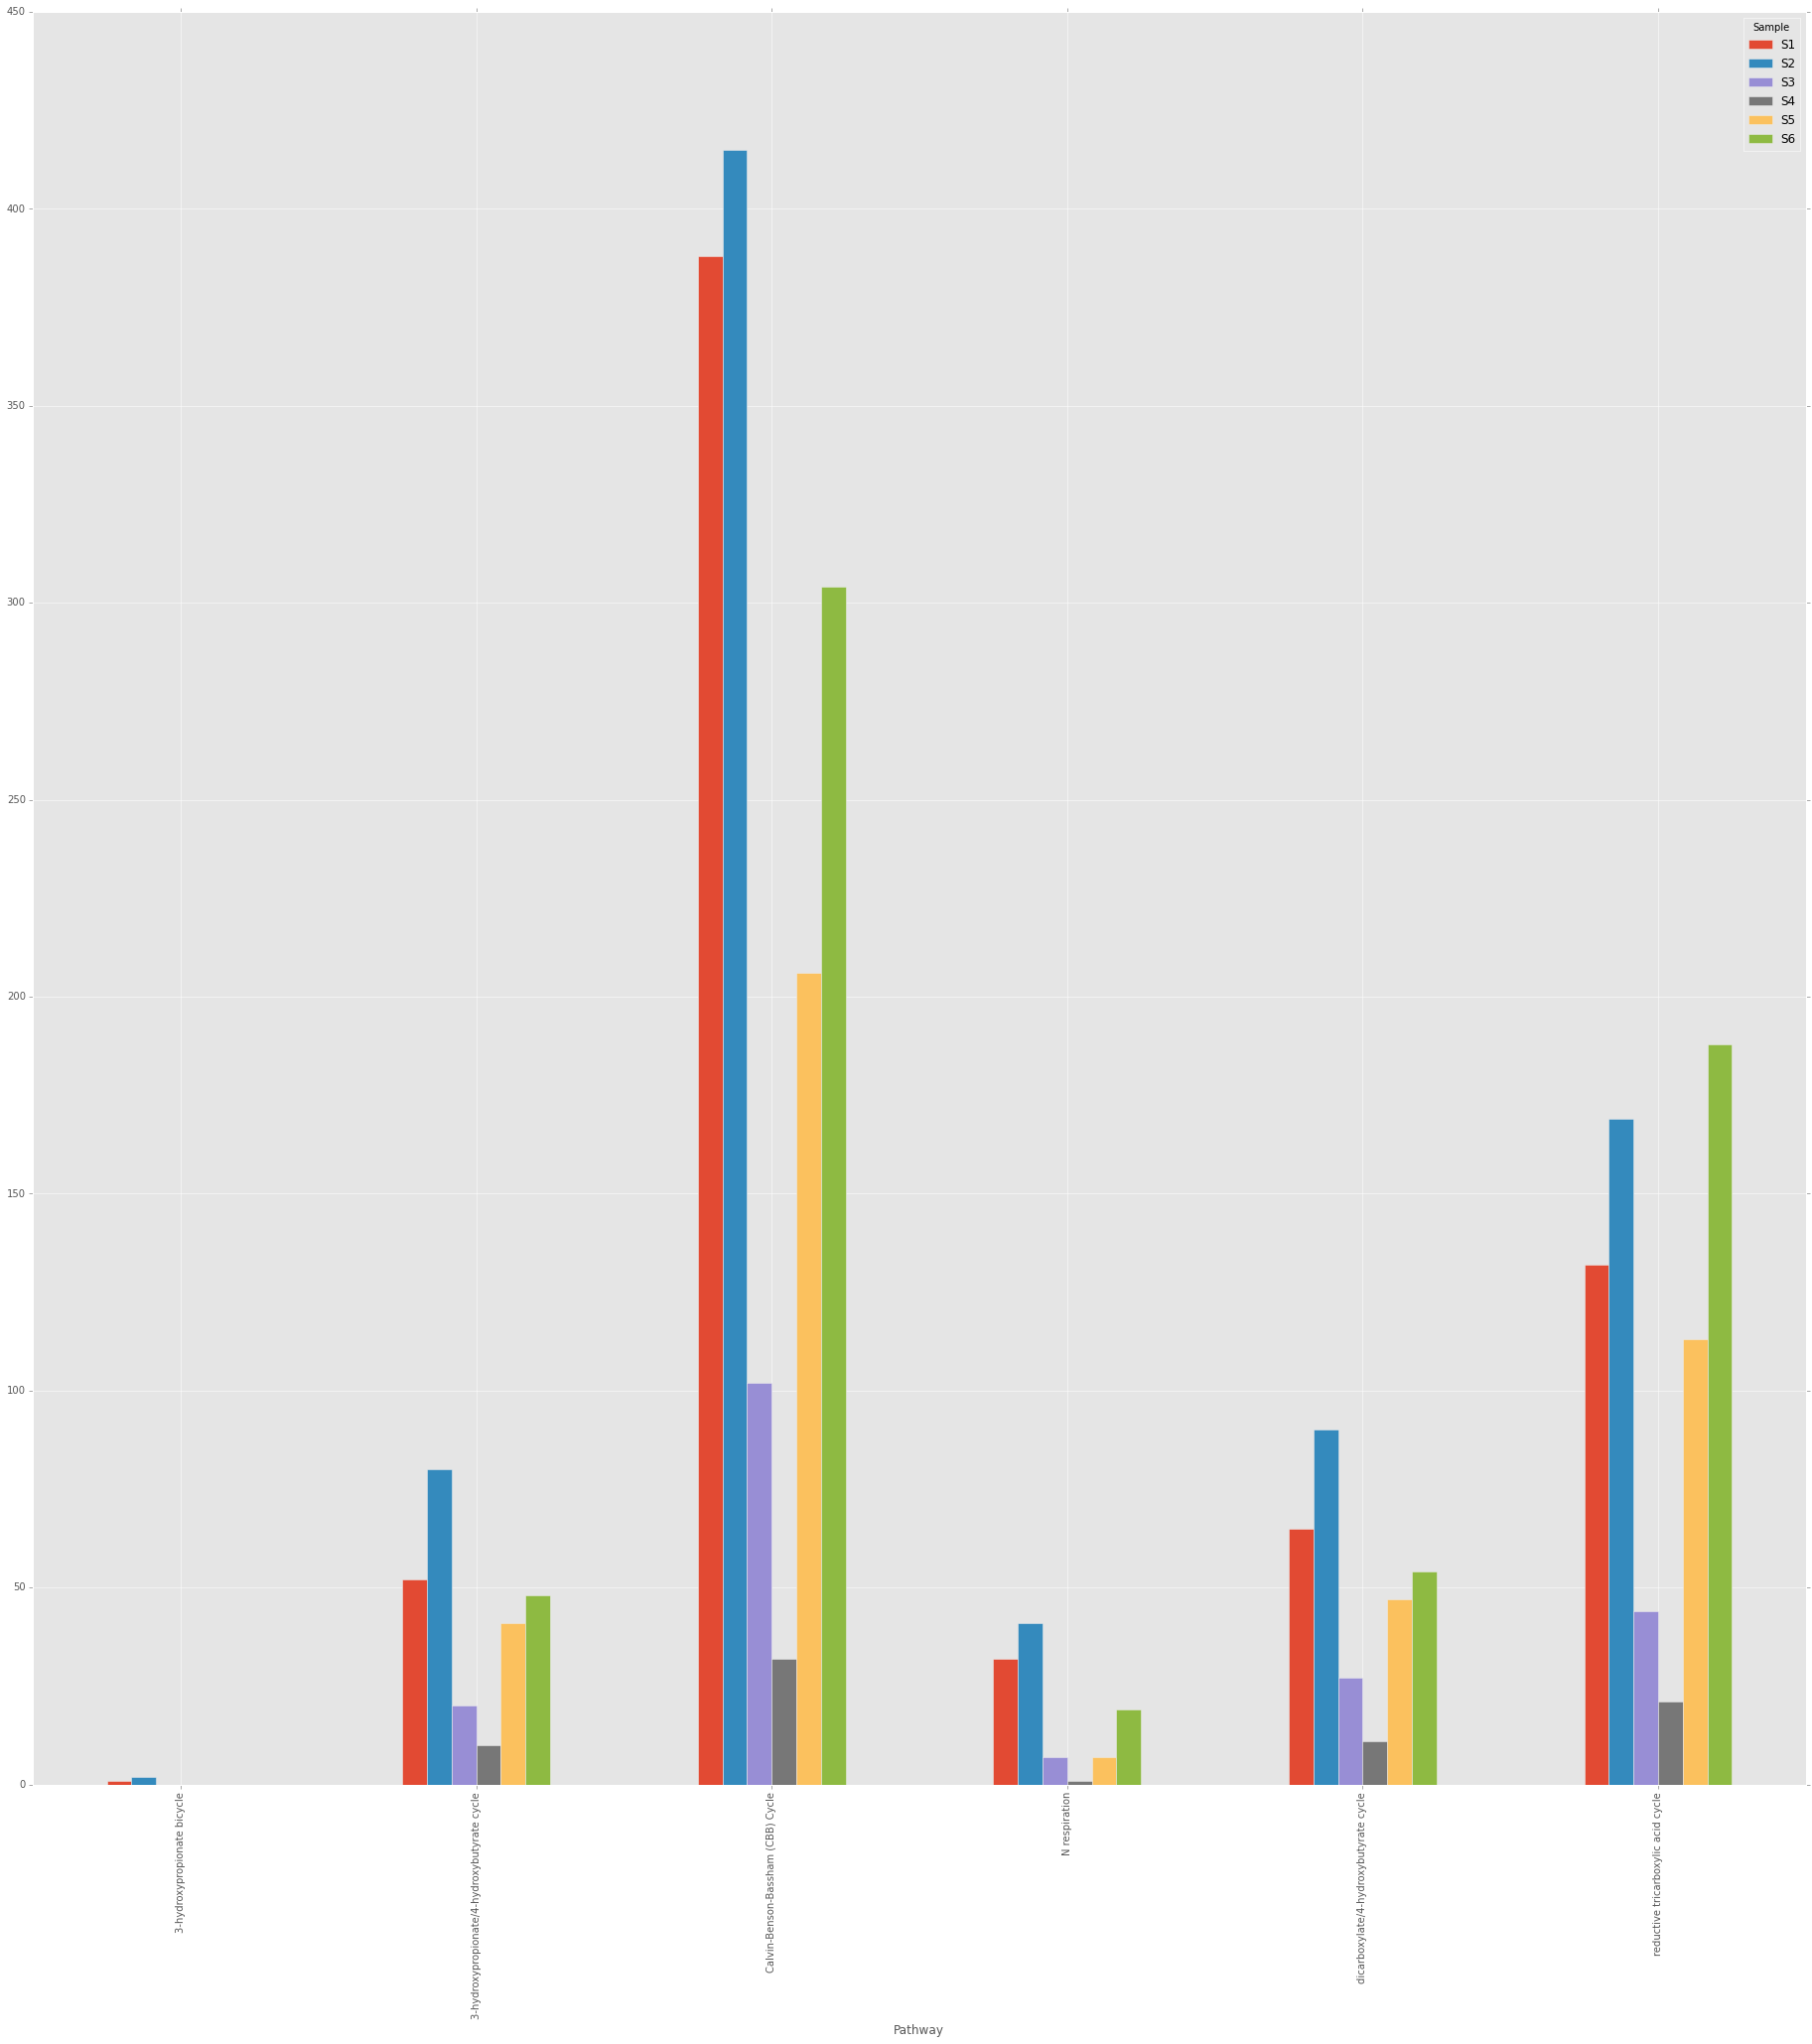

In [343]:
pr.groupby(level='Pathway').sum().xs('Bacteria', level='Organism', axis=1).plot(kind='bar')

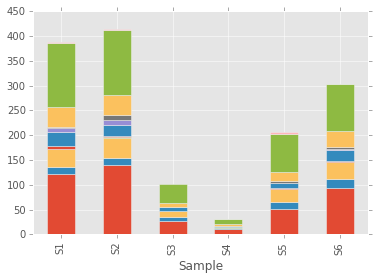

In [305]:
pr.xs('Calvin-Benson-Bassham (CBB) Cycle', level='Pathway').xs('Bacteria', level='Organism', axis=1).transpose().plot(kind='bar', stacked=True, legend=False)

In [311]:
pr.xs('Calvin-Benson-Bassham (CBB) Cycle', level='Pathway').xs('Bacteria', level='Organism', axis=1)

Sample                                                      S1   S2  S3  S4  \
Function                                                                      
Aldolase                                                   121  139  27  11   
Fructose-1,6-bisphosphatase                                 14   16   8   1   
Fructose-1-6-bisphosphatase                                  0    0   0   0   
Fructose-16-bisphosphatase                                   0    0   0   0   
Fructose-bisphosphate aldolase                              38   40  12   1   
L-ribulose-5-phosphate 4-epimerase                           0    1   0   1   
NAD(P)-dependent glyceraldehyde-3-phosphate dehydrogenase    0    0   0   0   
NADPH-dependent glycerol-3-phosphate dehydrogenase           6    3   0   1   
Phosphoglycerate kinase                                     28   22   9   1   
Phosphoriboisomerase A                                       7   10   0   0   
Ribose 5-phosphate isomerase                                 2   10   0   0   
Ribulose-phosphate 3-epimerase                              40   40   7   6   
Transketolase                                              129  132  39   9   
Triose-phosphate isomerase                                   3    2   0   1   

Sample                                                     S5  S6  
Function                                                           
Aldolase                                                   52  93  
Fructose-1,6-bisphosphatase                                13  19  
Fructose-1-6-bisphosphatase                                 0   0  
Fructose-16-bisphosphatase                                  0   0  
Fructose-bisphosphate aldolase                             27  35  
L-ribulose-5-phosphate 4-epimerase                          0   0  
NAD(P)-dependent glyceraldehyde-3-phosphate dehydrogenase   0   0  
NADPH-dependent glycerol-3-phosphate dehydrogenase          1   2  
Phosphoglycerate kinase                                    10  22  
Phosphoriboisomerase A                                      1   1  
Ribose 5-phosphate isomerase                                4   5  
Ribulose-phosphate 3-epimerase                             18  31  
Transketolase                                              76  95  
Triose-phosphate isomerase                                  4   1

Pathway
3-hydroxypropionate bicycle                    Axes(0.125,0.125;0.775x0.775)
3-hydroxypropionate/4-hydroxybutyrate cycle    Axes(0.125,0.125;0.775x0.775)
Calvin-Benson-Bassham (CBB) Cycle              Axes(0.125,0.125;0.775x0.775)
N respiration                                  Axes(0.125,0.125;0.775x0.775)
dicarboxylate/4-hydroxybutyrate cycle          Axes(0.125,0.125;0.775x0.775)
reductive tricarboxylic acid cycle             Axes(0.125,0.125;0.775x0.775)
dtype: object

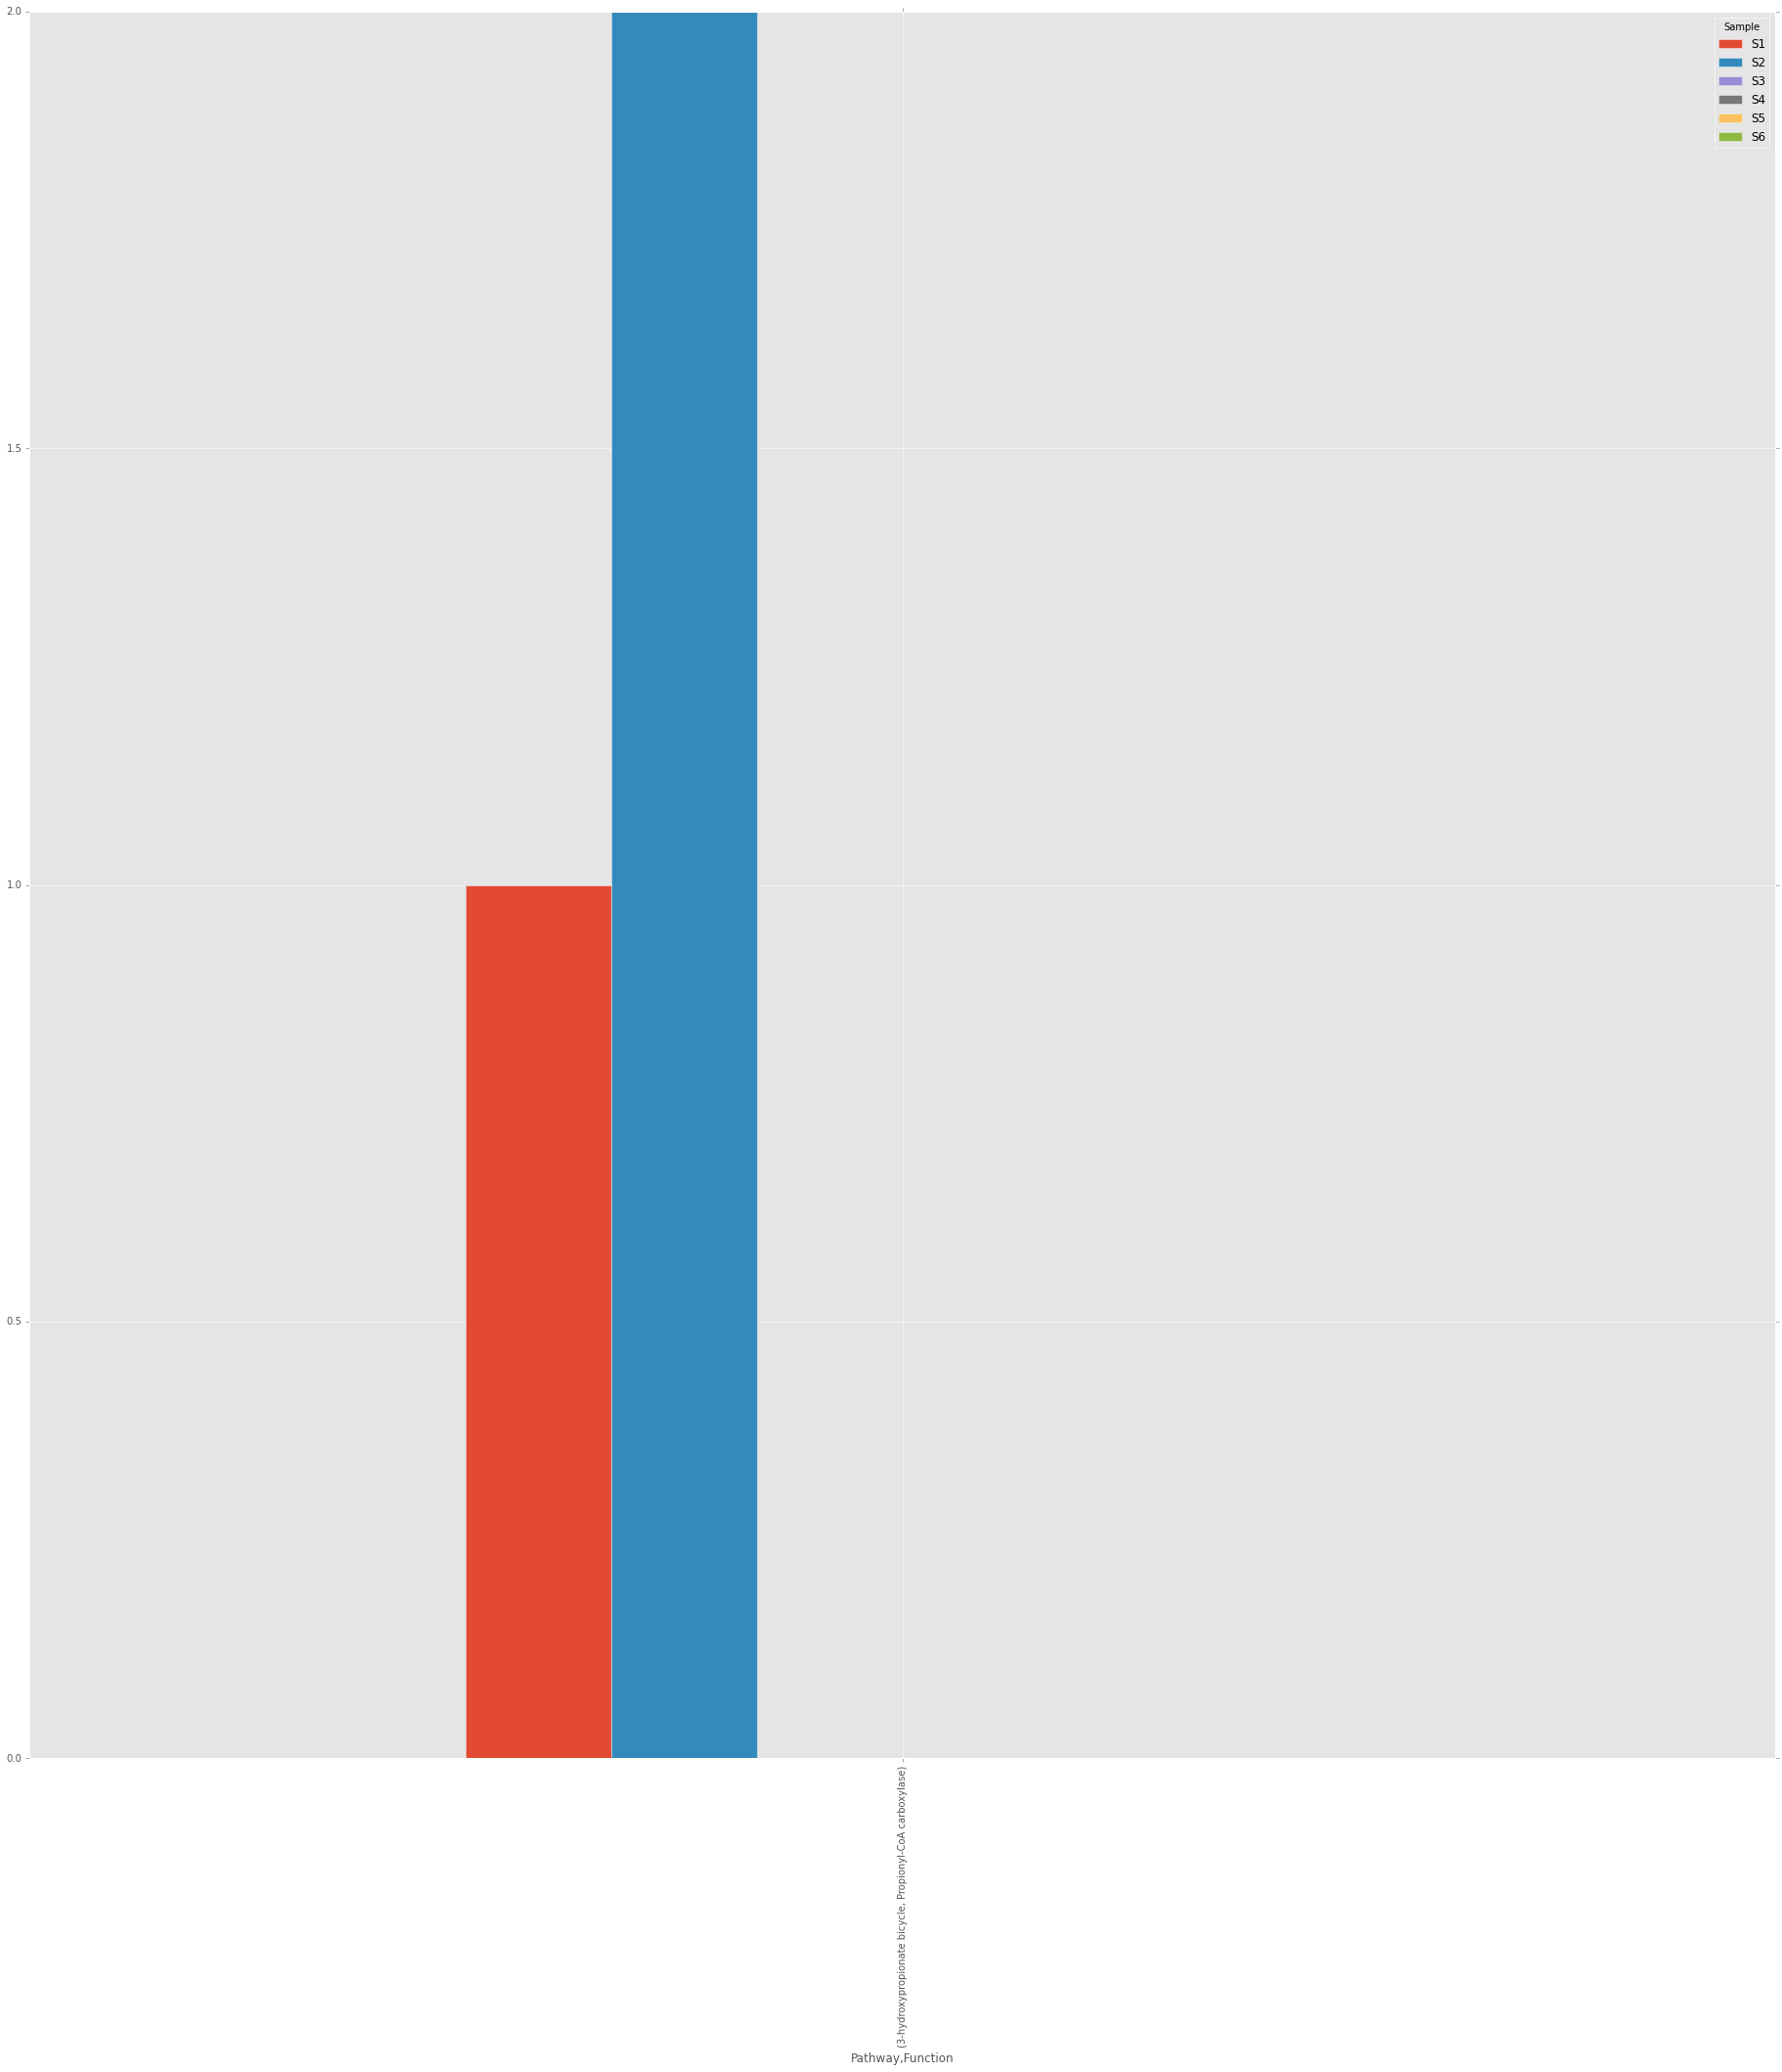

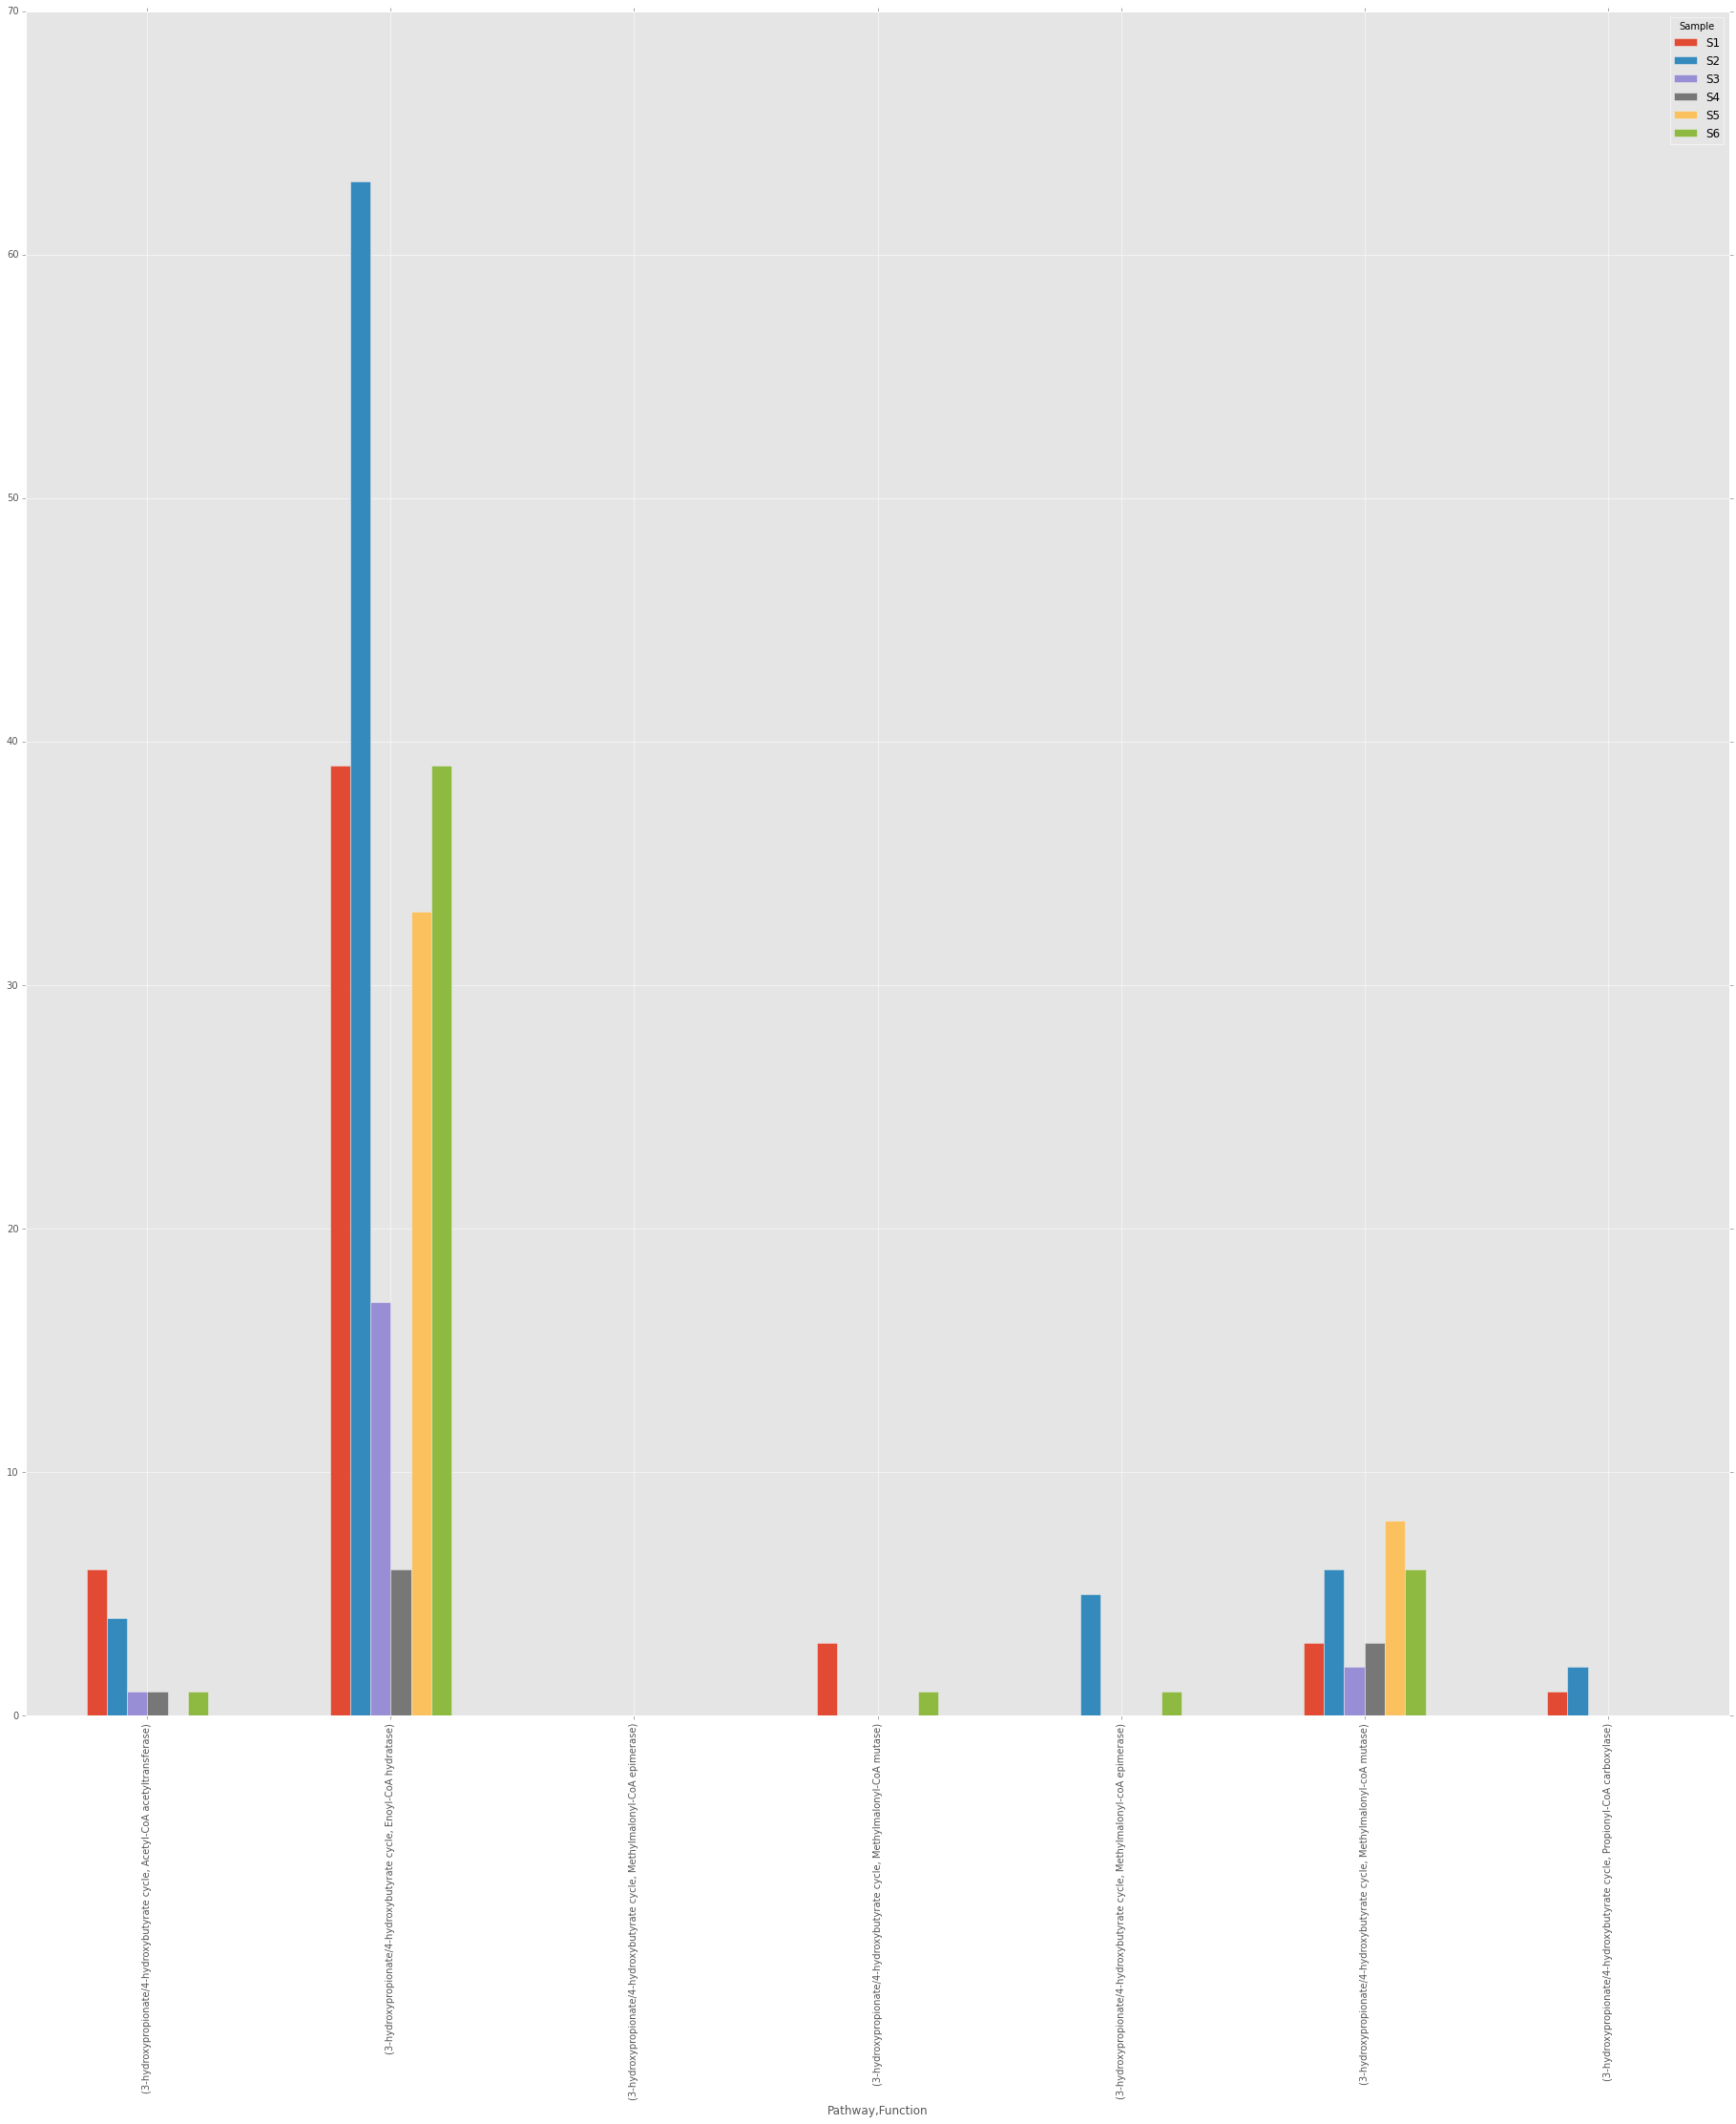

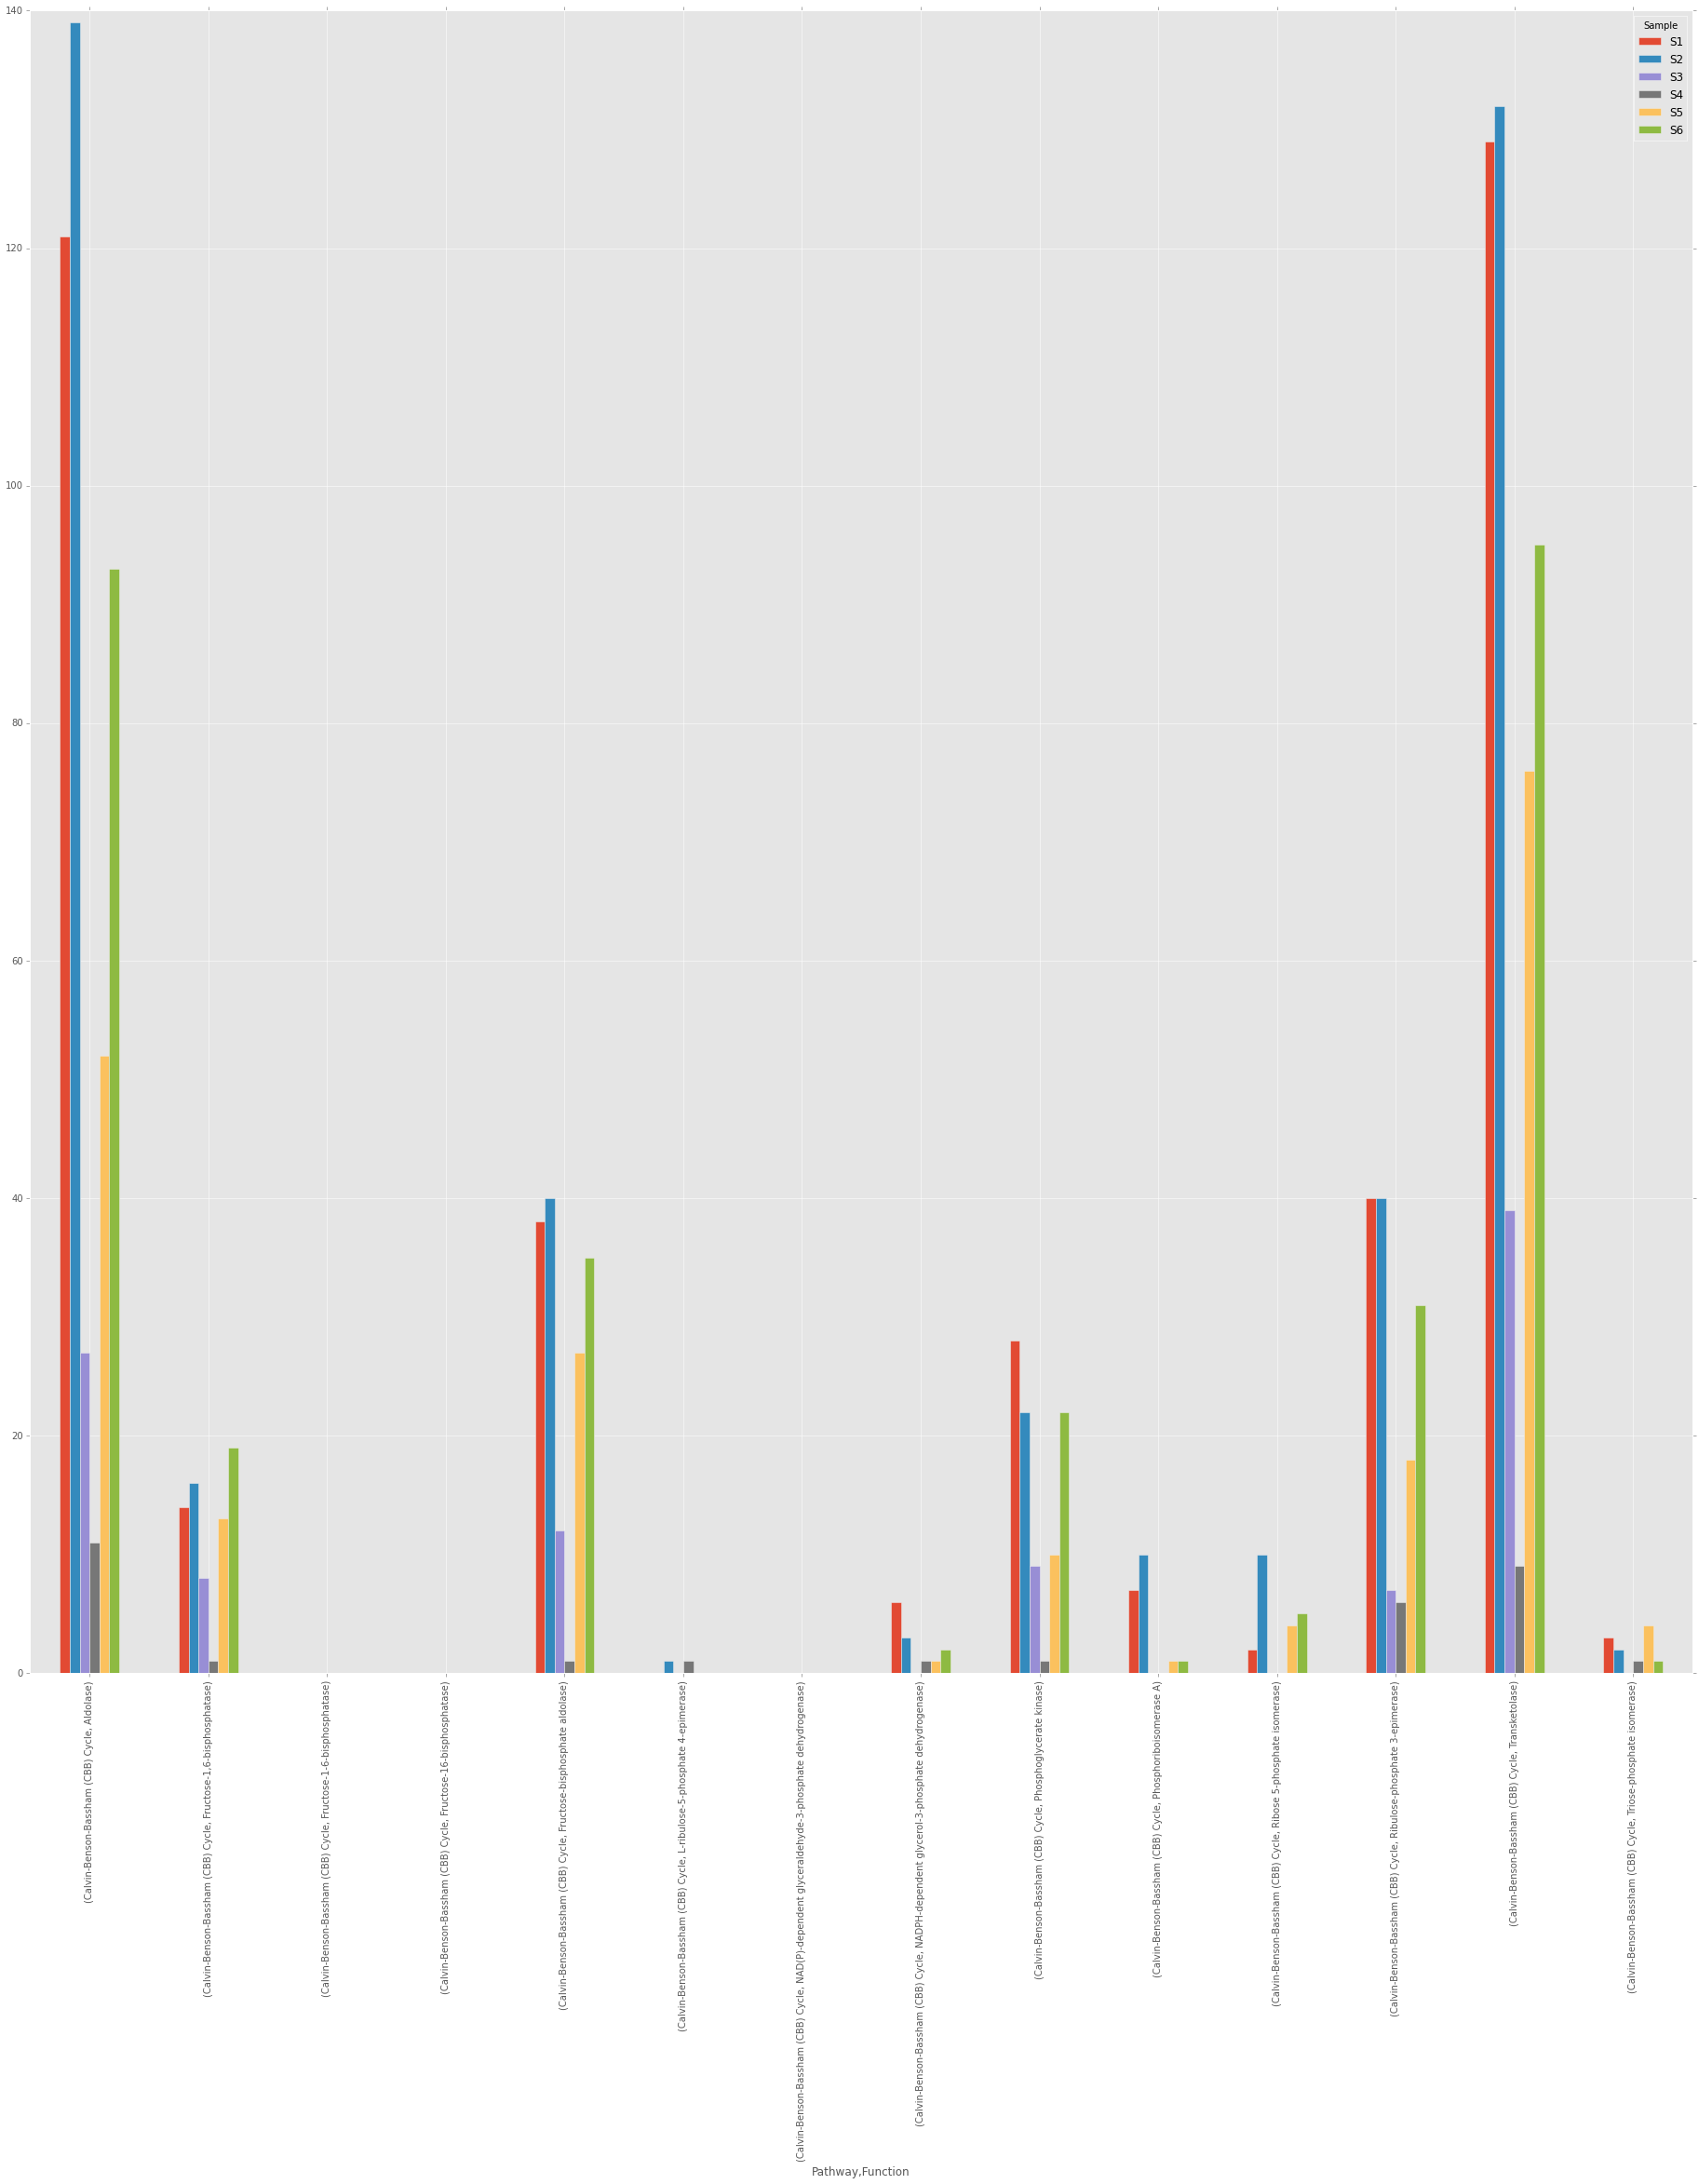

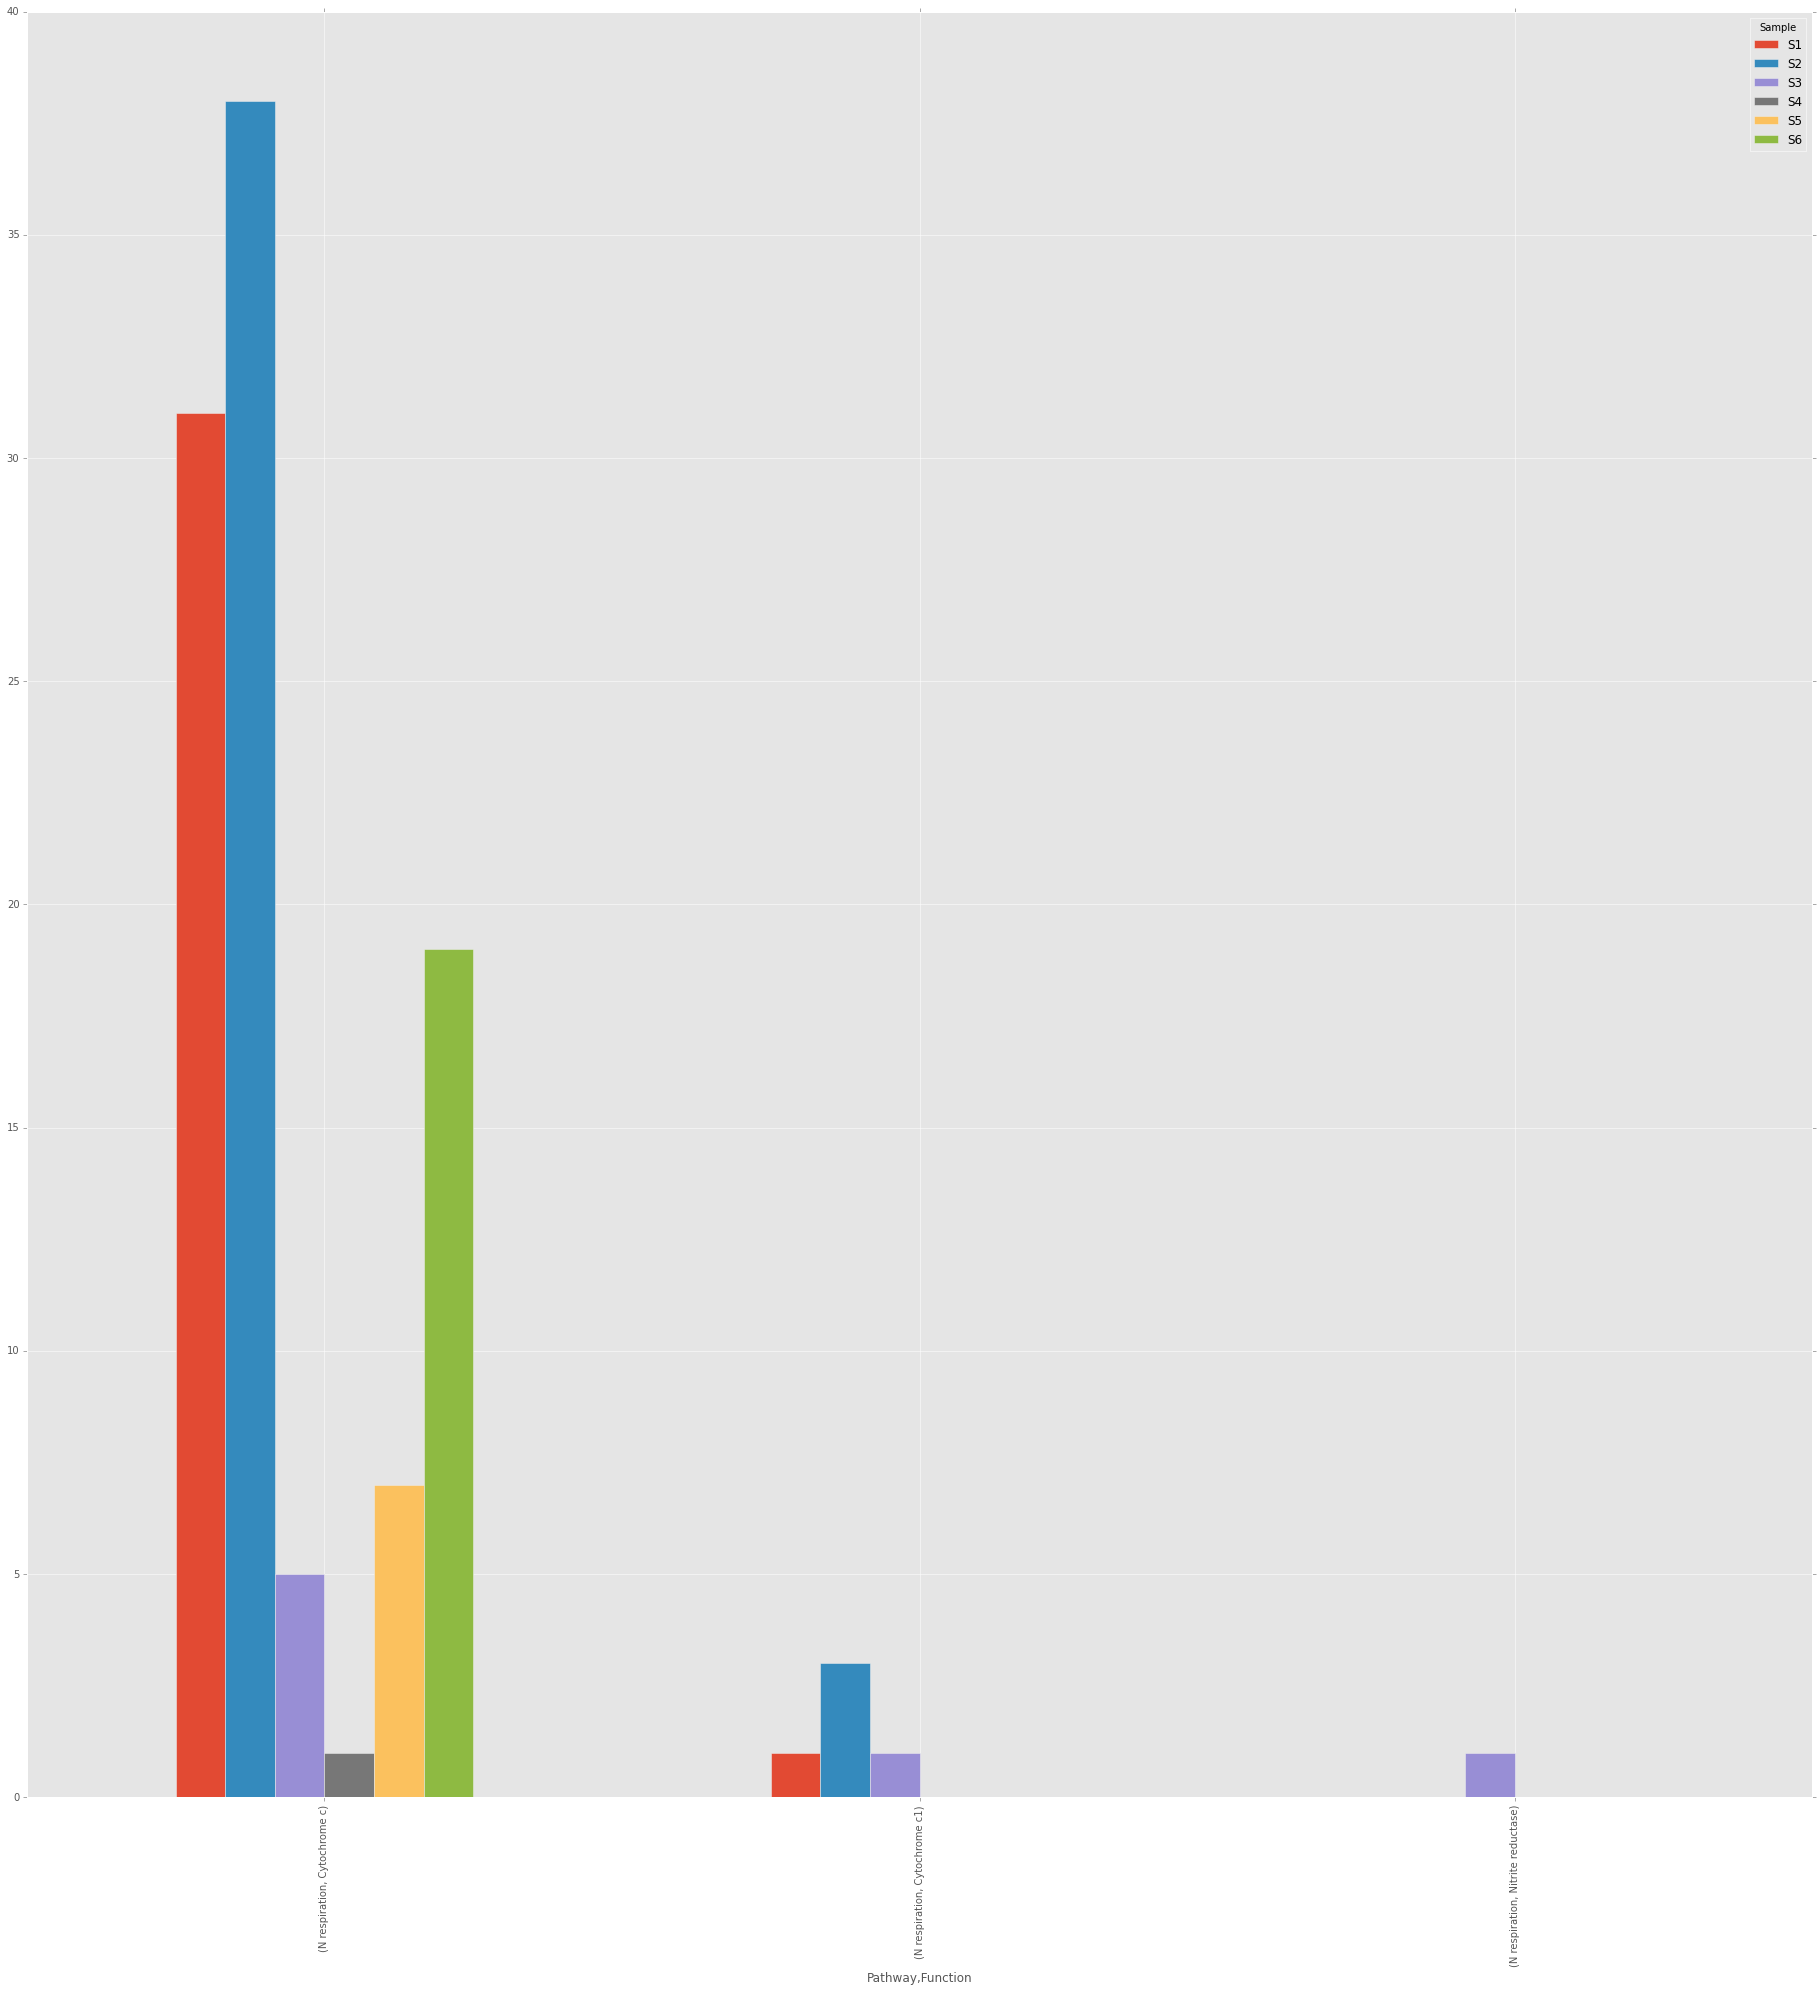

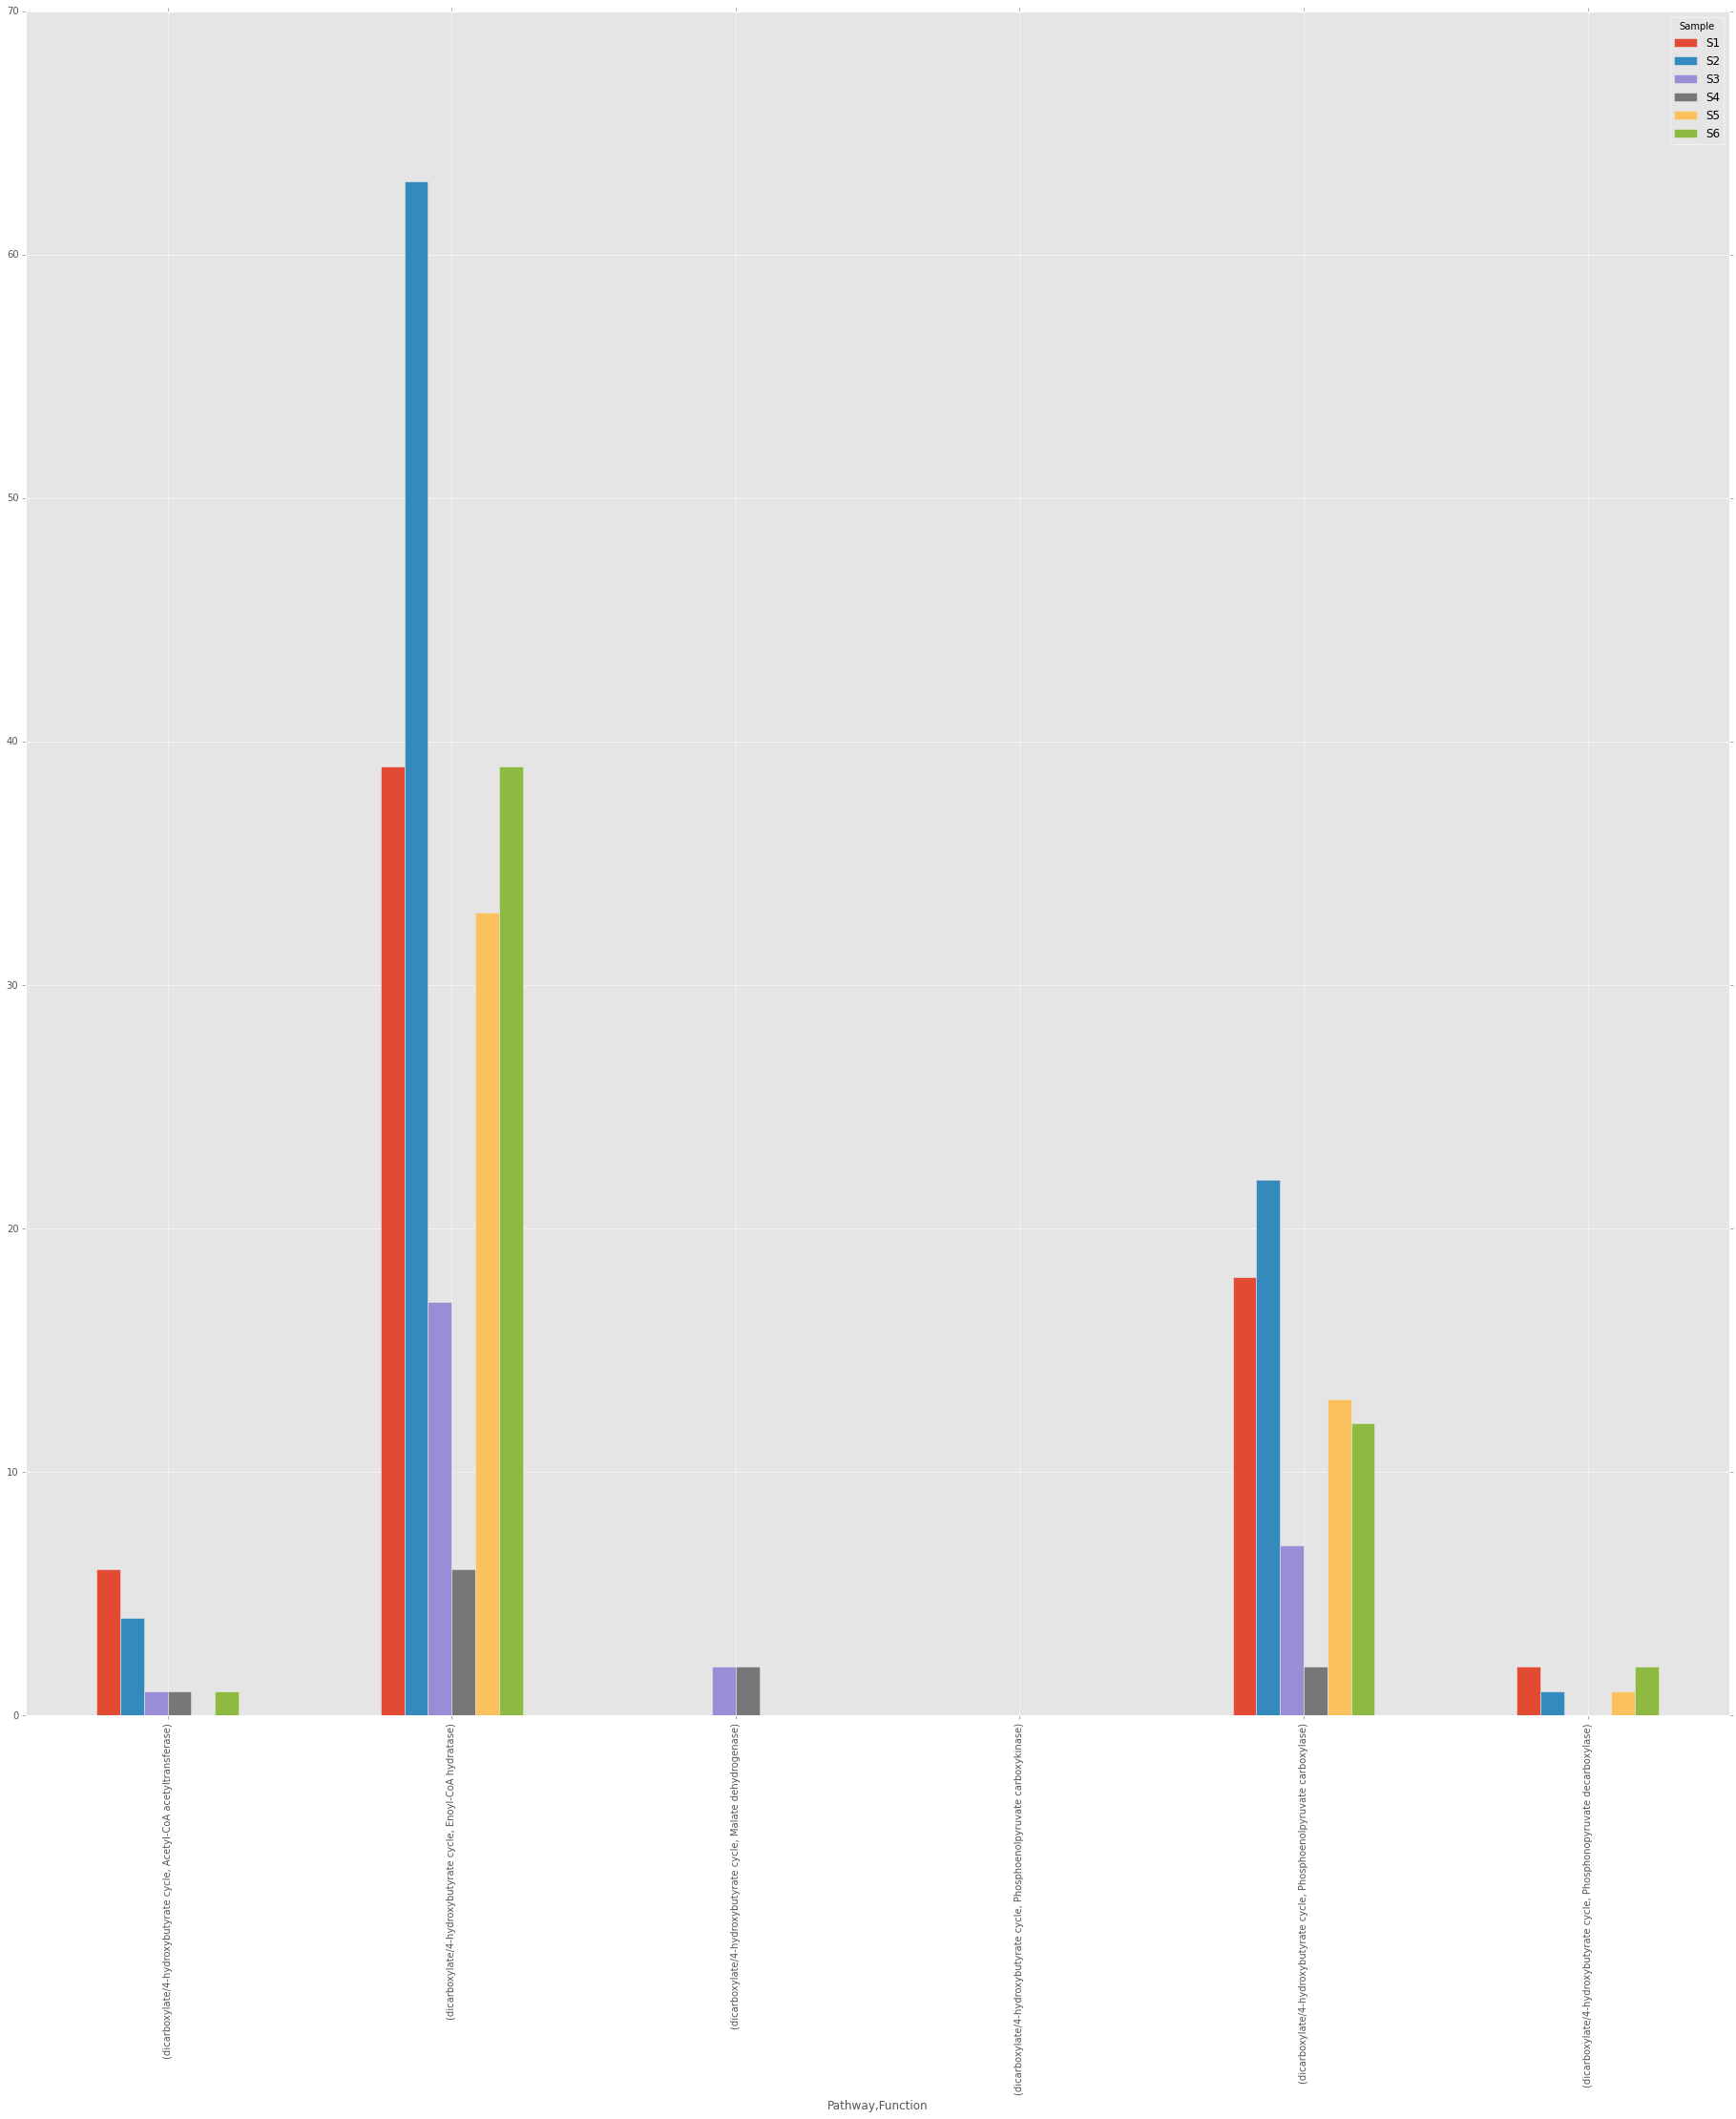

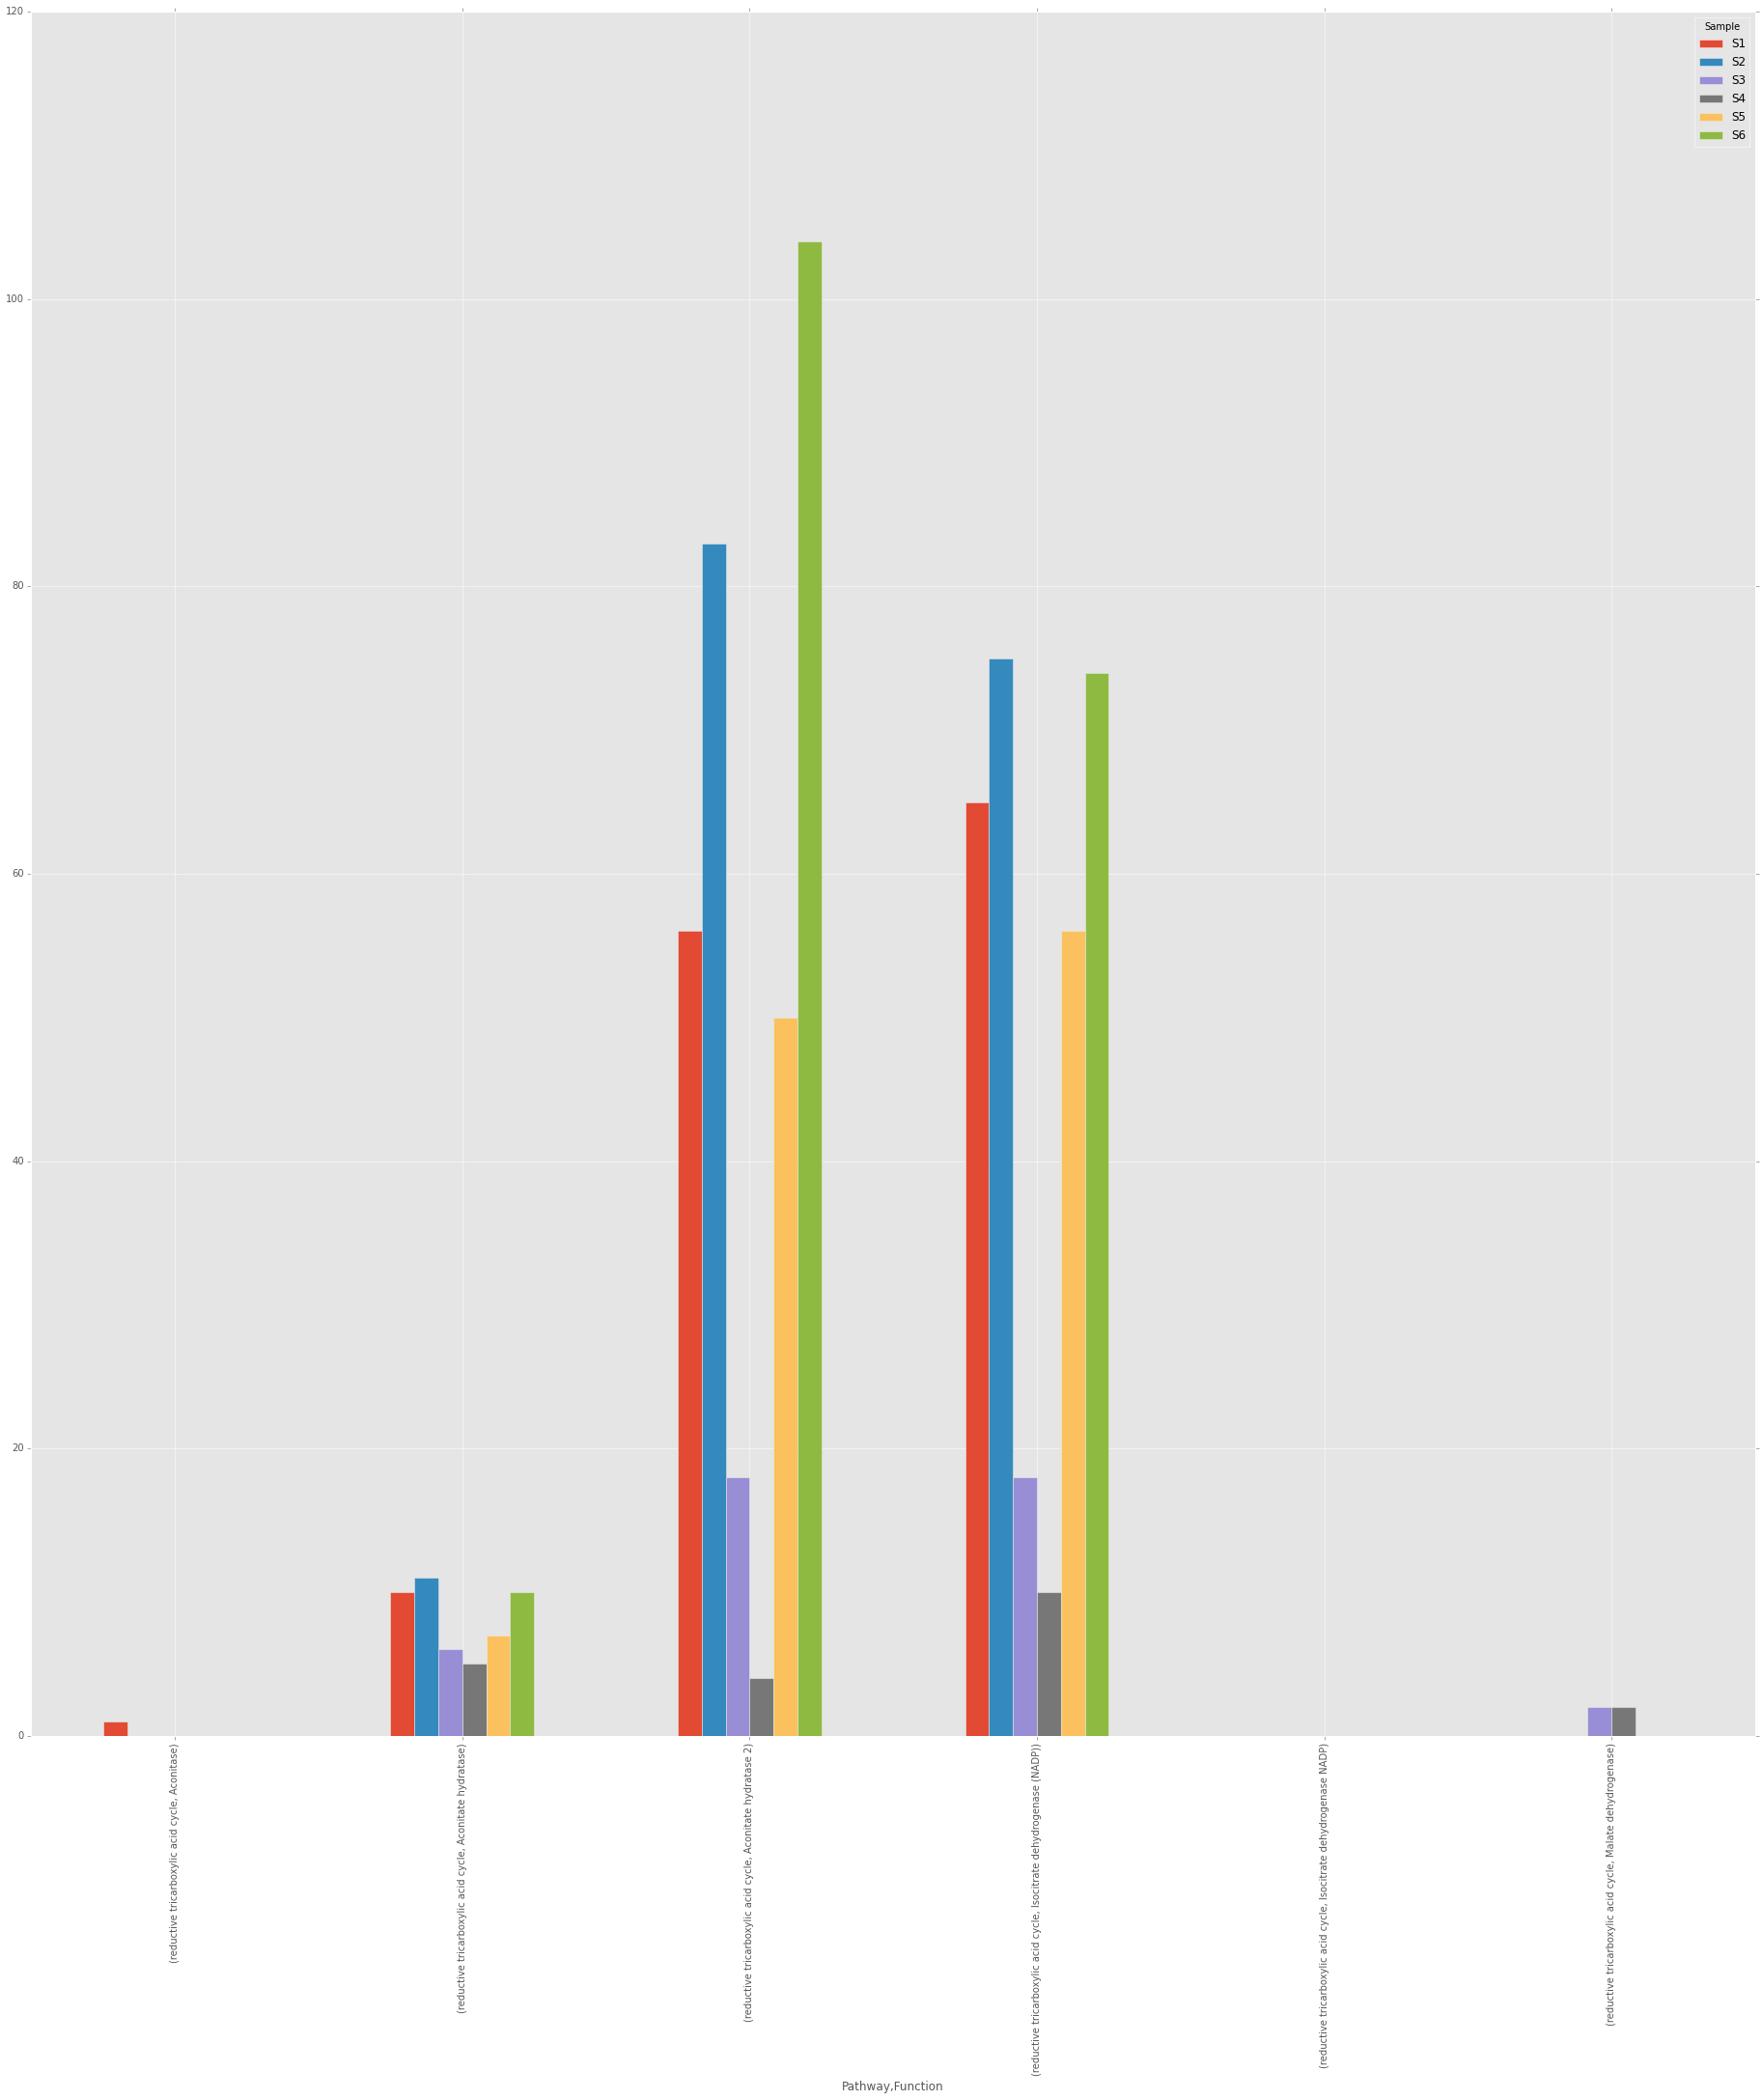

In [344]:
pr.xs('Bacteria', level='Organism', axis=1).groupby(level='Pathway').plot(kind='bar')